<a href="https://colab.research.google.com/github/ankesh86/DiffusionModels/blob/main/deterministic_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deterministic generation

In [1]:
!pip install diffusers transformers ftfy accelerate

import PIL
import torch
from io import BytesIO
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 2.4 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [2]:
prompt = "A beautiful oil painting of a singular lighthouse, shining its light across a tumultuous sea"

pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Now, define four different `Generator`'s and assign each `Generator` a seed (`0` to `3`) so you can reuse a `Generator` later for a specific image:

In [3]:
generator = [torch.Generator(device="cuda").manual_seed(i) for i in range(4)]

Generate the images and have a look:

  0%|          | 0/50 [00:00<?, ?it/s]

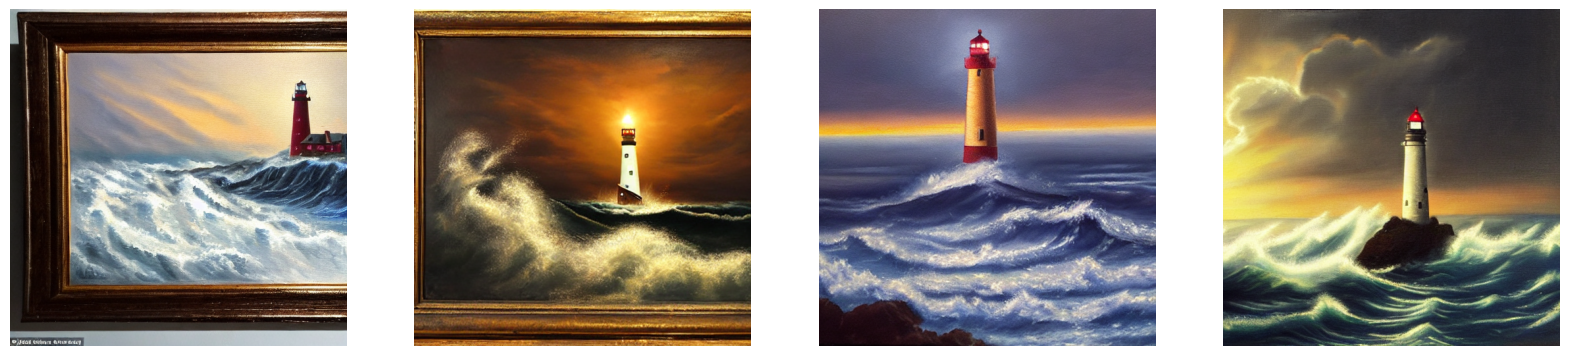

In [4]:
images = pipe(prompt, generator=generator, num_images_per_prompt=4).images

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Display each image
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')  # Turn off axis

plt.show()

In [5]:
prompt = [prompt + t for t in [", highly realistic", ", artsy", ", trending", ", colorful"]]
generator = [torch.Generator(device="cuda").manual_seed(2) for i in range(4)]

Create four generators with seed `0`, and generate another batch of images, all of which should look like the first image from the previous round!

  0%|          | 0/50 [00:00<?, ?it/s]

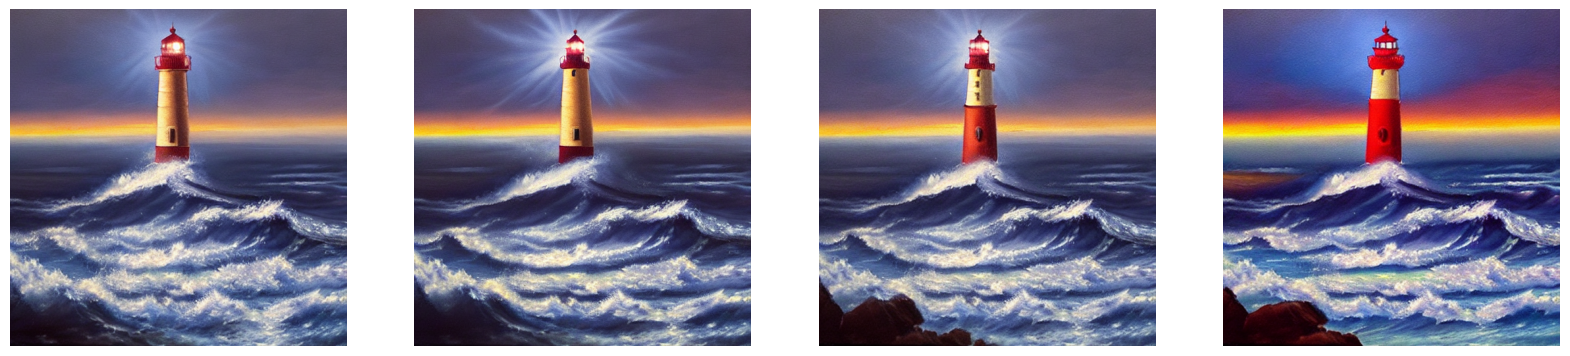

In [6]:
images = pipe(prompt, generator=generator).images

fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjust the size as needed

# Display each image
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')  # Turn off axis

plt.show()

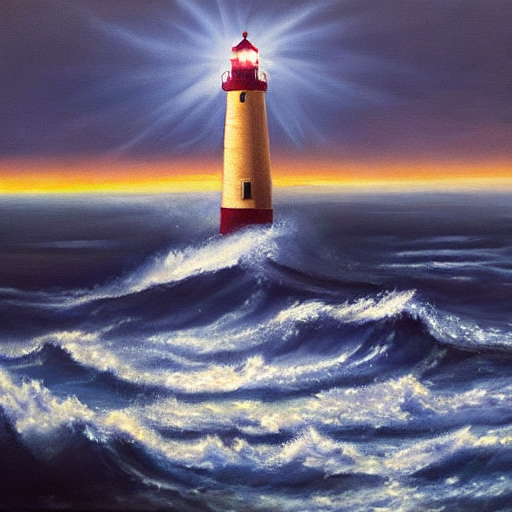

In [7]:
images[1]

In [ ]:
#